In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
# 设置主题
sns.set(style='whitegrid')
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [16]:
source_file='./Desktop/dataset/shop_info.txt'
shop_info = pd.read_csv(source_file,
                             names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],
                             dtype={'shop_id': np.int16, 'city_name': 'category', 'location_id': np.int16, 'per_pay': np.int8, 'score': 'object', 'comment_cnt': 'object',
                                   'shop_level': np.int8, 'cate_1_name': 'category', 'cate_2_name': 'category', 'cate_3_name': 'object'},
                            header=None)

In [5]:
user_pay=pd.read_csv('./Desktop/dataset/user_pay.txt',
                     names=['user_id', 'shop_id', 'time_stamp'],
                     dtype={'user_id': np.int32, 'shop_id': np.int16},
                     header=None)

In [6]:
user_view=pd.read_csv('./Desktop/dataset/user_view.txt',
                      names=['user_id', 'shop_id', 'time_stamp'],
                      dtype={'user_id': np.int32, 'shop_id': np.int16},
                      header=None)
user_view.columns=['user_id','shop_id','time_stamp']

In [7]:
shop_info.head()

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
0,1,湖州,885,8,4,12,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,南昌,774,5,3,2,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,杭州,263,2,2,2,0,美食,休闲食品,生鲜水果


In [8]:
shop_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   shop_id      2000 non-null   int16   
 1   city_name    2000 non-null   category
 2   location_id  2000 non-null   int16   
 3   per_pay      2000 non-null   int8    
 4   score        1709 non-null   object  
 5   comment_cnt  1709 non-null   object  
 6   shop_level   2000 non-null   int8    
 7   cate_1_name  2000 non-null   category
 8   cate_2_name  2000 non-null   category
 9   cate_3_name  1415 non-null   object  
dtypes: category(3), int16(2), int8(2), object(3)
memory usage: 71.5+ KB


In [9]:
user_pay.head()

,user_id,shop_id,time_stamp
0,22127870,1862,2015-12-25 17:00:00
1,3434231,1862,2016-10-05 11:00:00
2,16955285,1862,2016-02-10 15:00:00
3,13799128,1862,2016-01-13 14:00:00
4,13799128,1862,2016-07-05 12:00:00


In [10]:
user_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69674110 entries, 0 to 69674109
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int32 
 1   shop_id     int16 
 2   time_stamp  object
dtypes: int16(1), int32(1), object(1)
memory usage: 930.2+ MB


In [11]:
user_view.head()

,user_id,shop_id,time_stamp
0,13201967,1197,2016-10-21 18:00:00
1,19461365,1197,2016-06-28 23:00:00
2,15022321,1197,2016-07-16 19:00:00
3,5440872,1197,2016-07-15 07:00:00
4,12594529,1197,2016-08-07 16:00:00


In [12]:
user_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556715 entries, 0 to 5556714
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int32 
 1   shop_id     int16 
 2   time_stamp  object
dtypes: int16(1), int32(1), object(1)
memory usage: 74.2+ MB


检查重复值

In [13]:
dup_shop_info= shop_info.duplicated().sum()
print("shop_info发现有 [{}] 条重复数据！".format(dup_shop_info))
dup_user_pay= user_pay.duplicated().sum()
print("user_pay发现有 [{}] 条重复数据！".format(dup_user_pay))
dup_user_view= user_view.duplicated().sum()
print("user_view发现有 [{}] 条重复数据！".format(dup_user_view))

shop_info发现有 [0] 条重复数据！
user_pay发现有 [2517084] 条重复数据！
user_view发现有 [757364] 条重复数据！


重复值删除

In [14]:
user_pay.drop_duplicates(keep='first',inplace=True)
user_view.drop_duplicates(keep='first',inplace=True)

In [15]:
检查空值

NameError: name '检查空值' is not defined

In [17]:
print(shop_info.isnull().values.sum())
print(user_pay.isnull().values.sum())
print(user_view.isnull().values.sum())

1167
0
0


In [18]:
# 先将 score、comment_cnt 两列通过object类型读入，然后用字符'0'填充NaN，再向下转为最小整形，integer参数让系统自动决定使用最小是哪种整型
shop_info['score'] = pd.to_numeric(shop_info['score'].fillna('0'), downcast='integer')        # 先进行fillna替换NaN的值，然后再改类型，如果反顺序执行，则类型仍为float无法改变
shop_info['comment_cnt'] = pd.to_numeric(shop_info['comment_cnt'].fillna('0'), downcast='integer')
# 处理 cate_3_name 的空值
shop_info['cate_3_name'] = shop_info['cate_3_name'].fillna('无三级分类').astype('category')

## 统计最受欢迎的前 10 类商品(按照二级分类统计)以及人均消费

In [19]:
user_pay['time_stamp']=pd.to_datetime(user_pay['time_stamp'])

In [209]:
#count每个time_stamp商家付款次数

In [20]:
#as_idex=False在分组后的前面加索引
time_stamp_count=user_pay[['shop_id','time_stamp']].groupby('shop_id',as_index=False).agg('count').rename(columns={'time_stamp':'payment_count'})

In [21]:
user_pay=user_pay.append(time_stamp_count)

In [22]:
# 商家付款总次数

In [225]:
shop_id_payment_count=user_pay.pivot_table(index='shop_id',values='payment_count',aggfunc='sum')
shop_id_payment_count

,payment_count
shop_id,
1,90242.0
2,37906.0
3,10284.0
4,13398.0
5,31090.0
...,...
1996,6965.0
1997,40084.0
1998,44331.0


In [24]:
date_merge=pd.merge(shop_info,user_pay,left_on='shop_id',right_on='shop_id')

In [25]:
result=date_merge[['cate_2_name','payment_count','per_pay']].groupby('cate_2_name',as_index=False).agg({'payment_count':'sum','per_pay':'mean'}).rename(columns={'payment_count':'total_amount'}).sort_values(by='total_amount',ascending=False).head(10)

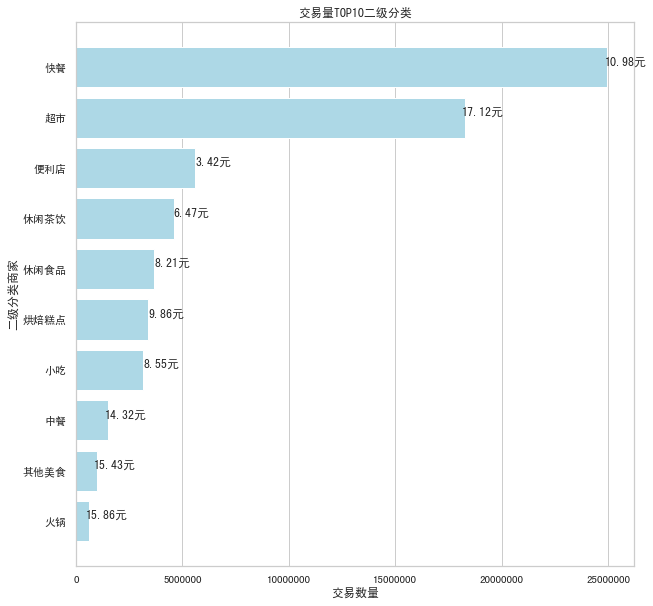

In [197]:
# 二级分类数据划分-第1种画法将y轴翻转，由于上面result是从大到小排列，在水平柱状图中y轴是从0开始从下到上，所以需要把y轴翻转使图形排列正确
fig,ax=plt.subplots(figsize=(10, 10)) 
y=result['cate_2_name']
width=result['total_amount']
z=result['per_pay']
plt.barh(y,width,color=['lightblue'])
ax.invert_yaxis()#反转y轴使得能从大到小排序，必须要第一行的ax函数才能调用
ax.xaxis.get_major_formatter().set_useOffset(False)# 关闭x轴科学计数法显示
ax.xaxis.get_major_formatter().set_scientific(False)# 关闭x轴科学计数法显示
for a,b,c in zip(y,width,z):
 plt.text(b+c+850000,a,'%.2f元'%c,ha = 'center',va = 'bottom',fontsize=12)#+8500为移动标签的位置
plt.title('交易量TOP10二级分类')
plt.grid(axis='y')#隐藏x轴网格线
plt.xlabel('交易数量')
plt.ylabel('二级分类商家')
plt.show()

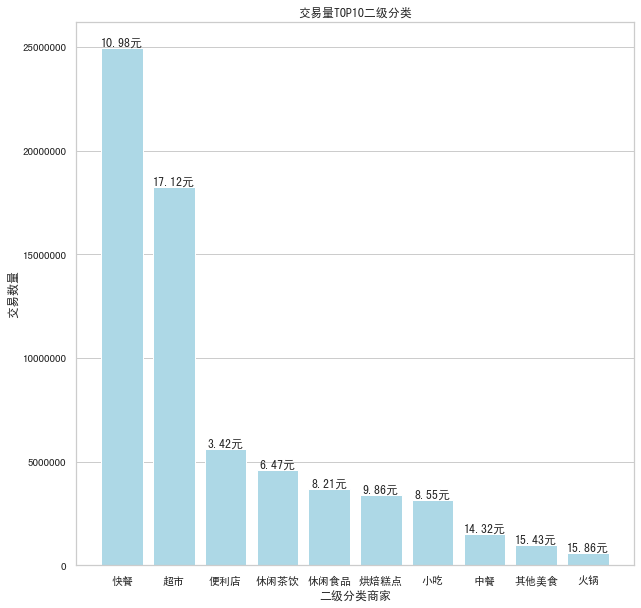

In [199]:
# 二级分类数据划分-第二种画法
fig,ax=plt.subplots(figsize=(10, 10)) 
x=result['cate_2_name']
y=result['total_amount']
z=result['per_pay']
plt.bar(x,y,color=['lightblue'])
ax.yaxis.get_major_formatter().set_useOffset(False)# 关闭y轴科学计数法显示
ax.yaxis.get_major_formatter().set_scientific(False)# 关闭y轴科学计数法显示
for a,b,c in zip(x,z,y):
 plt.text(a,b+c,'%.2f元'%b,ha = 'center',va = 'bottom',fontsize=12)
plt.title('交易量TOP10二级分类')
plt.xlabel('二级分类商家')
plt.ylabel('交易数量')
plt.grid(axis='x')
plt.show()
# 这边设置的x、y，z值代表了不同柱子在图形中的位置（坐标），通过for循环找到每一个x、z，y值的相应坐标——a,b,c，
# 再使用plt.text在对应位置添文字说明来生成相应的数字标签，而for循环也保证了每一个柱子都有标签。
# 其中，a, b+c表示在每一柱子对应x值、y值上方total_amount的数值+per_pay的数值总和处标注文字说明，'%.2f元' % b，代表标注的文字，%b即每个柱子对应的y值标签，其中2表示保留小数点的后两位，1就表示显示小数后面一位，在f后面是添加文字描述。
# 以此类推； ha='center', va= 'bottom'代表horizontalalignment（水平对齐）、verticalalignment（垂直对齐）的方式，fontsize则是文字大小。条形图、折线图也是如此设置，饼图则在pie命令中有数据标签的对应参数。对于累积柱状图、双轴柱状图则需要用两个for循环，同时通过a与b的不同加减来设置数据标签位置。

# 浏览次数最多的 50 个商家，并输出他们的城市以及人均消费

In [205]:
user_view['time_stamp']=pd.to_datetime(user_view['time_stamp'])

In [226]:
#计算每个商家的用户浏览总次数
shopid_view_count=user_view[['shop_id','time_stamp']].groupby('shop_id',as_index=False).agg('count').rename(columns={'time_stamp':'view_count'})

In [227]:
shopid_view_count

,shop_id,view_count
0,1,4795
1,2,5520
2,3,534
3,4,4116
4,5,346
...,...,...
1992,1996,572
1993,1997,494
1994,1998,1735
1995,1999,2843


In [228]:
data_merge2=pd.merge(shop_info,shopid_view_count,left_on='shop_id',right_on='shop_id')

In [245]:
result2=data_merge2[['shop_id','city_name','view_count','per_pay']].sort_values(by='view_count',ascending=False).head(50)
result2

,shop_id,city_name,view_count,per_pay
1907,1911,天津,51409,20
1674,1677,济南,47612,20
1536,1539,宁波,44785,20
1667,1670,南京,43615,20
796,799,苏州,40204,20
43,44,郑州,30239,20
1819,1823,广州,28936,20
882,885,武汉,27670,20
1319,1322,杭州,26279,20
194,195,孝感,23033,19


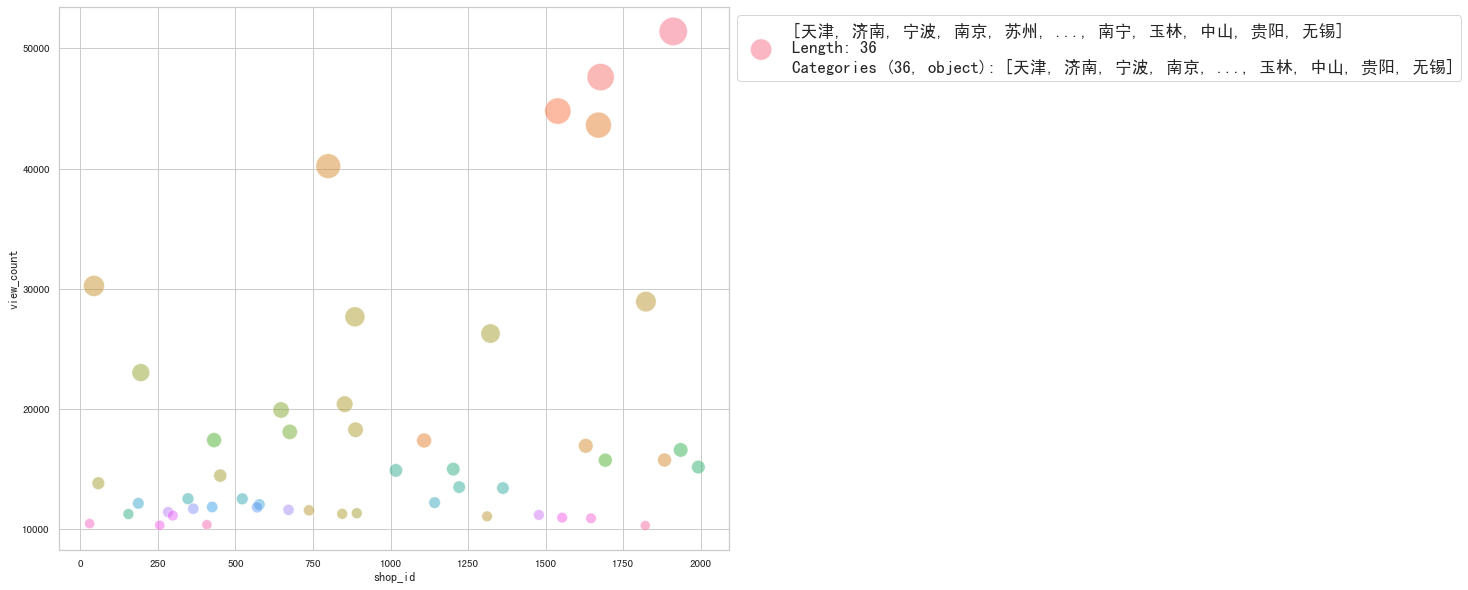

In [300]:
x=result2['shop_id']
y=result2['view_count']
z=result2['city_name']
a=result2['city_name'].unique()
plt.figure(figsize=(12,10))
#设置参数hue对城市控制分组颜色
sns.scatterplot(x, y, size=y,hue=z,legend=False, alpha=0.5, sizes=(100, 800),label=a)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)
plt.show()